<a href="https://colab.research.google.com/github/ArturoReyFM/Aprendizaje-no-supervisado/blob/main/ArturoCopia_14_45_12042021_Copia_de_26marzo2021RMSVK_Fourier_Transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bibliografia 
#https://pybonacci.org/2012/09/29/transformada-de-fourier-discreta-en-python-con-scipy/  #Espectro FFT imaginario
#https://community.sw.siemens.com/s/article/root-mean-square-rms-and-overall-level  #RMS
#https://www.ni.com/es-mx/innovations/white-papers/06/understanding-ffts-and-windowing.html  # Funcion ventana explicacion fisica
#https://flothesof.github.io/FFT-window-properties-frequency-analysis.html ##funcion ventana en python

#http://prosig.com/wp-content/uploads/pdf/blogArticles/OmegaArithmetic.pdf ##Metodologia para obtener la velocidad y el desplazamiento
#https://iopscience.iop.org/article/10.1088/1757-899X/591/1/012096/pdf

##https://tesis.ipn.mx/bitstream/handle/123456789/27734/dise%C3%B1o%20de%20un%20sistema%20de%20monitoreo%20de%20vibraciones%20en%20maquinas%20rotativas%20criticas%20en%20la%20linea%20de%20produccion%20de%20lija.pdf?sequence=1&isAllowed=y


# Signal analysis
# This code gets data on velocity and time. Does an analysis of fundamental frequencies with Fourier. The fundamental frequency is an associate with the moment vibration of the system.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Librerias
import pandas as pd
import numpy as np
from os import listdir
%matplotlib inline
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_context('talk',font_scale=.8)

import scipy.fftpack
from astropy.timeseries import LombScargle
from scipy.signal import get_window
import scipy.integrate as it

In [ ]:
#sensitive=142
#zero_input=0.0001##50/1024
#s=((df['Value']-zero_input)/(sensitive))#-25

# Funcion ventana para DTF

#Find the dir of data to analyze.
# A data table of the 100k for second is our data list. We make comparing the 100k with data to 2k and the influence in vibration

In [ ]:
!ls '/content/drive/MyDrive/viakableArturo'

Copia_de_Copia_de_26marzo2021RMSVK_Fourier_Transform.ipynb  raw_data_2k.csv
raw_data_100k.csv


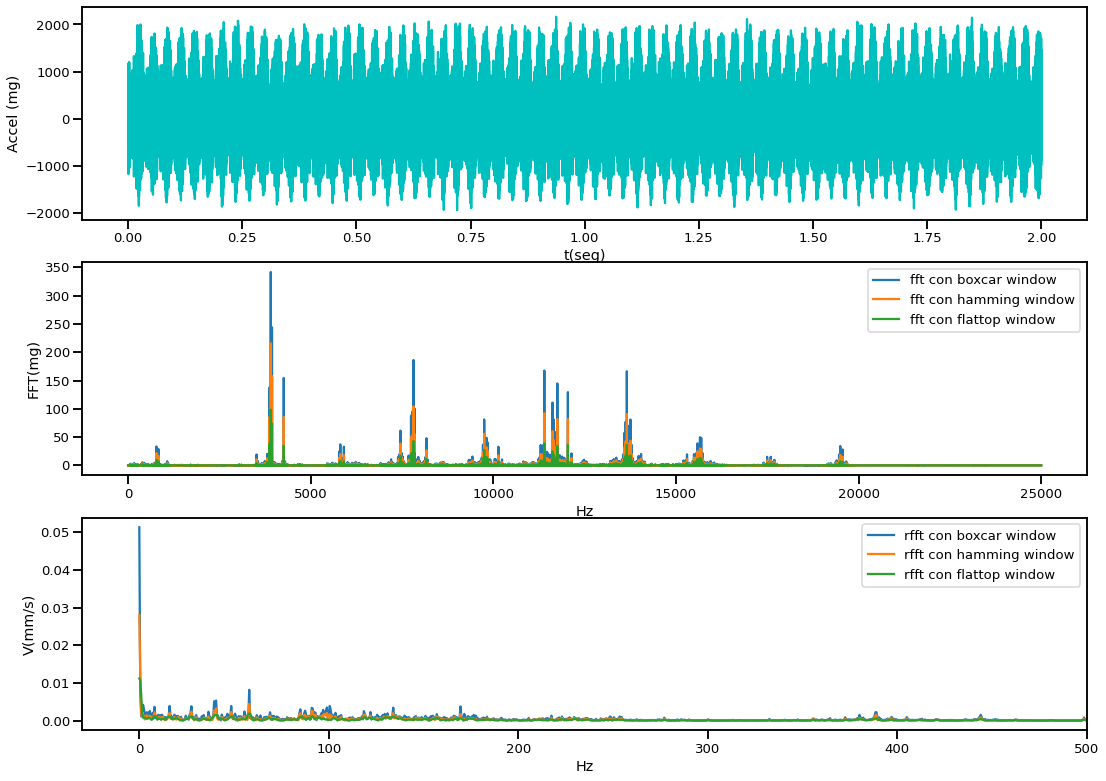

In [ ]:

#Cargo base de Datos
df=pd.read_csv('/content/drive/My Drive/viakableArturo/raw_data_100k.csv', sep=';')
#df['TimeStamp'] = pd.to_datetime(df["TimeStamp"])
df.shape
if len(df)==2000:
  fo=1000     ###sampling rate
  seg=2       ###time
else:
  fo=50000    ###sampling rate
  seg=2.00001 ###time


t=np.linspace(0.0, seg, int((seg**2)/ muestreo(seg, fo))) #
df['time']=t
len(t)
s=df['Value']*100
N = len(s)
#m = t.size
t=df.time
m=len(s)
n = len(s)
a_int = it.cumtrapz(s ,t,initial=0) 
len(a_int)
#a_int=a_int-np.max(a_int)/2
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)
for window in ['boxcar', 'hamming', 'flattop']:
    n = len(s)
    w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
    plt.plot(freqs, (2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-30, 500)
#plt.ylim(0, 6)
plt.ylabel('FFT(mg)')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
for window in ['boxcar', 'hamming', 'flattop']:
    n = len(a_int)
    w = np.fft.rfft(a_int * get_window(window, m), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
    plt.plot(freqs, (2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 0.707*(2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
plt.xlim(-30, 500)
#plt.xlim(0, 60)
#plt.xlim(-5, 1700)
plt.ylabel('V(mm/s)')
plt.xlabel('Hz')
plt.legend()
plt.savefig('raw_data100k_2603021.png')

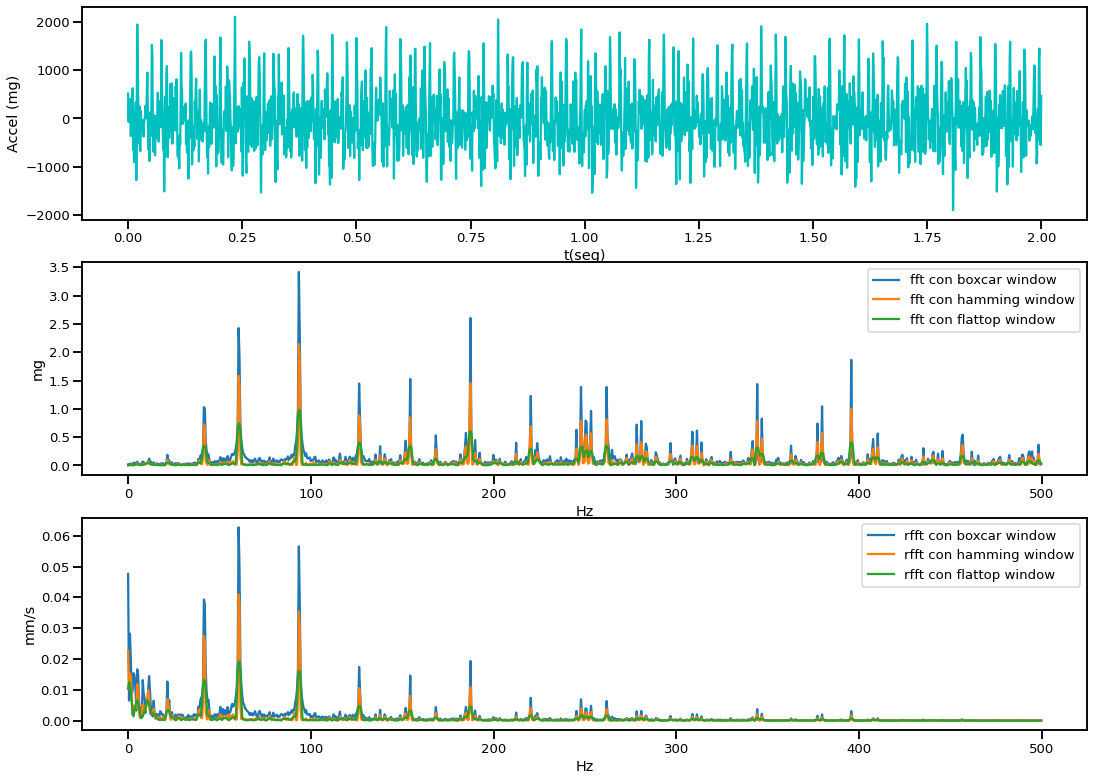

In [ ]:

#Cargo base de Datos
df=pd.read_csv('/content/drive/My Drive/viakableArturo/raw_data_2k.csv', sep=';')
#df['TimeStamp'] = pd.to_datetime(df["TimeStamp"])
df.shape
if len(df)==2000:
  fo=1000###frecuencia de muestreo
  seg=2###tiempo
else:
  fo=50000###frecuencia de muestreo
  seg=2.00001###tiempo


t=np.linspace(0.0, seg, int((seg**2)/ muestreo(seg, fo))) #
df['time']=t
len(t)
s=df['Value']*100
N = len(s)
#m = t.size
t=df.time
m=len(s)
n = len(s)
a_int = it.cumtrapz(s ,t,initial=0) 
len(a_int)
#a_int=a_int-np.max(a_int)/2
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)
for window in ['boxcar', 'hamming', 'flattop']:
    n = len(s)
    w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
    plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
for window in ['boxcar', 'hamming', 'flattop']:
    n = len(a_int)
    w = np.fft.rfft(a_int * get_window(window, m), n=n)
    freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
    plt.plot(freqs, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
    #plt.plot(freqs, 0.707*(2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 1000)
#plt.xlim(0, 60)
#plt.xlim(-5, 1700)https://en.wikipedia.org/wiki/Aliasing
plt.ylabel('mm/s')
plt.xlabel('Hz')
plt.legend()
plt.savefig('raw_data2k_2603021.png')

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html



> Rectangular window

La ventana rectangular (a veces conocida como el boxcar o la ventana de Dirichlet) es la ventana más simple, equivalente a reemplazar todos los valores excepto N de una secuencia de datos por ceros 


$w[n]=1$

> Hamming window

Las ventanas habituales de suma de coseno para el caso K  = 1 tienen la forma:

$w [n] = a_ {0} - {(1-a_ {0})} _ {a_ {1}} \dot \ cos ({\frac {2 \pi n} {N }}), \quad 0 \leq n \leq N \quad ,\quad a_ {0}=0.54$




> Flat top window

Una ventana superior plana es una ventana de valor parcialmente negativo que tiene una pérdida de scalloping loss en el dominio de frecuencia. Esa propiedad es deseable para la medición de amplitudes de componentes de frecuencia sinusoidal. 


$w [n] = a_ {0} - a_ {1} \ cos({\frac {2 \ pi n} {N}}) + a_ {2} \ cos ({\frac {4 \ pi n} {N}})- a_ {3} \ cos ({\frac {6 \ pi n} {N}}) + a_ {4} \ cos ({\frac {8 \ pi n} {N}})$






# Integracion numerica por el metodo trapezoidal rule

La regla del trapecio compuesta o regla de los trapecios es una forma de aproximar una integral definida utilizando n trapecios. En la formulación de este método se supone que f es continua y positiva en el intervalo [a,b]. De tal modo la integral definida $\int _{a}^{b}f(x)\,dx$ representa el área de la región delimitada por la gráfica de f y el eje x, desde x=a hasta x=b. Primero se divide el intervalo [a,b] en n subintervalos, cada uno de ancho $ \Delta x=(b-a)/n$.

Después de realizar todo el proceso matemático se llega a la siguiente fórmula:

$\int _{a}^{b}f(x)\,dx\sim {\frac {h}{2}}[f(a)+2f(a+h)+2f(a+2h)+...+f(b)]$

Donde $h={\frac {b-a}{n}}$ y n es el número de divisiones.

Imagen -> https://es.wikipedia.org/wiki/Regla_del_trapecio#/media/Archivo:Trapezoidal_rule_illustration_small.svg
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.cumtrapz.html



# DFT

The DFT is defined by the formula

$ X_{k}=\sum _{n=0}^{N-1}x_{n}e^{-i2\pi kn/N}\qquad k=0,\ldots ,N-1$

https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html

# Sección nueva

In [ ]:
#Cargo base de Datos
df=pd.read_csv('/content/drive/My Drive/viakableArturo/raw_data_2k.csv', sep=';')
#df['TimeStamp'] = pd.to_datetime(df["TimeStamp"])
df.shape
if len(df)==2000:
  fs=1000###frecuencia de muestreo
  seg=2###tiempo
else:
  fs=50000###frecuencia de muestreo
  seg=2.00001###tiempo

t=np.linspace(0.0, seg, int((seg**2)/ muestreo(seg, fs))) #
df['time']=t
len(t)
s=df['Value']*100
N = len(s) #Numero total de muestras
data = s

#m = t.size
t=df.time
m=len(s)
n = len(s)
a_int = it.cumtrapz(s ,t,initial=0) 
len(a_int)
#a_int=a_int-np.max(a_int)/2
a_int


cutoff = 50
nyq = 1000
order = 3

In [ ]:
from scipy.signal import butter,filtfilt

# We make lowpass filter to do research in the fundamental frequencies in the data 2k. We take the library butter and filtfilt with a little function that needs a cut frequency and the Nyquist frequency to obtain data. The function return y; contains the transfer function values.

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [ ]:


y = butter_lowpass_filter(data, cutoff, fs, order)
y

array([487.64608861, 430.31968986, 374.48858877, ..., 298.3275197 ,
       314.34875176, 328.85346143])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


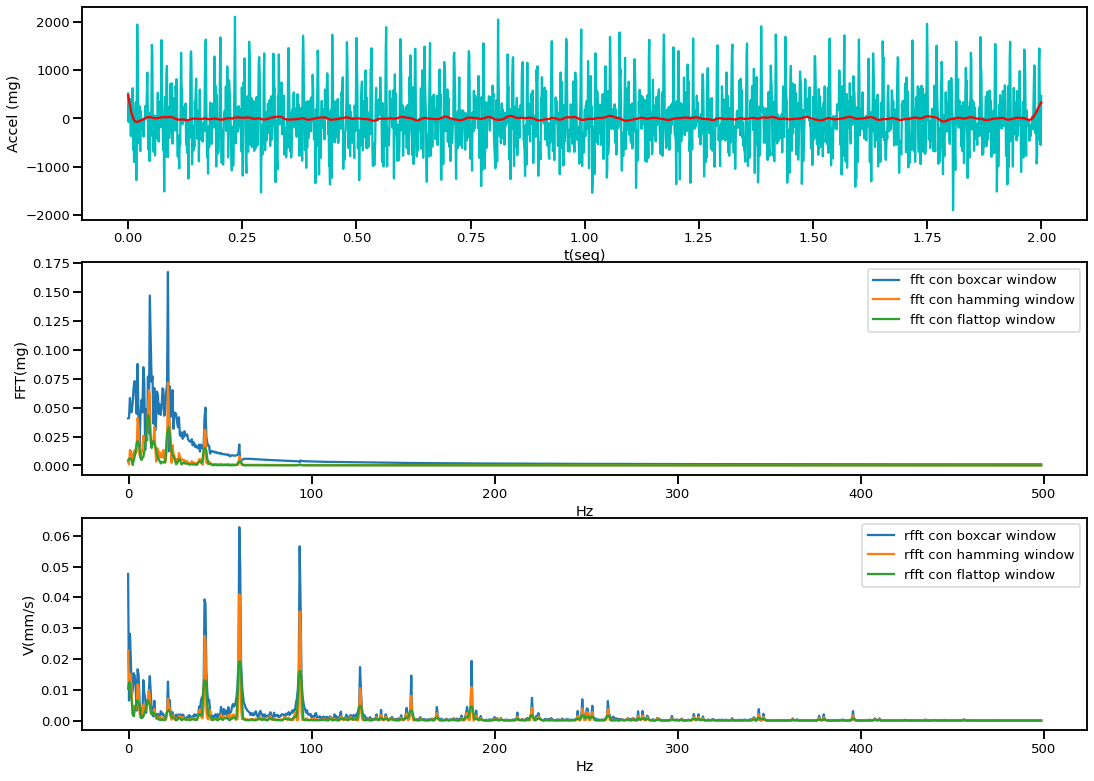

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.plot(t, y, 'c', label='signal', color='r')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)

for window in ['boxcar', 'hamming', 'flattop']:

  n = len(s)
  w = np.fft.rfft(y * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
  freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
  freqs1 = butter_lowpass_filter(freqs, cutoff, fs, order)

#window ='boxcar'
#n = len(s)
#w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
#freqs = np.fft.rfftfreq(n, d=t[1] - t[0])
  #plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')    
  plt.plot(freqs1, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
  plt.ylabel('FFT(mg)')
  plt.xlabel('Hz')
  plt.legend()
for window in ['boxcar', 'hamming', 'flattop']:

  n = len(a_int)
  w = np.fft.rfft(a_int * get_window(window, m), n=n)
  #freqs2 = np.fft.rfftfreq(n, d=t[1] - t[0])
  freqs3 = butter_lowpass_filter(freqs2, cutoff, fs, order)

  plt.subplot(413)
  #plt.plot(freqs2, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
  plt.plot(freqs3, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
  plt.ylabel('V(mm/s)')
  plt.xlabel('Hz')
  plt.legend()


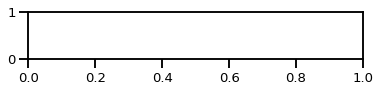

In [ ]:
window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
window ='boxcar'
n = len(a_int)
w = np.fft.rfft(a_int * get_window(window, m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])

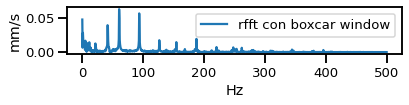

In [ ]:


window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
window ='boxcar'
n = len(a_int)
w = np.fft.rfft(a_int * get_window(window, m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])



plt.plot(freqs, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
    #plt.plot(freqs, 0.707*(2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 1000)
#plt.xlim(0, 60)
#plt.xlim(-5, 1700)https://en.wikipedia.org/wiki/Aliasing
plt.ylabel('mm/s')
plt.xlabel('Hz')
plt.legend()
plt.savefig('raw_data2k_2603021.png')

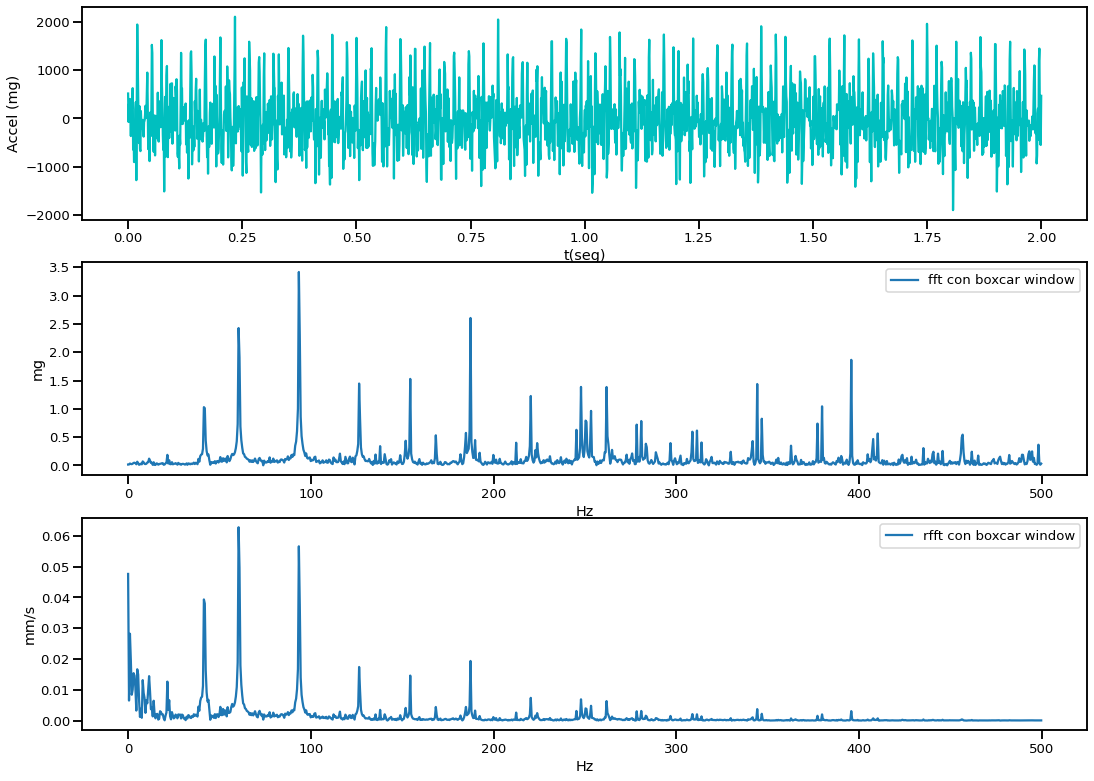

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)

window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
window ='boxcar'
n = len(a_int)
w = np.fft.rfft(a_int * get_window(window, m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])



plt.plot(freqs, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
    #plt.plot(freqs, 0.707*(2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 1000)
#plt.xlim(0, 60)
#plt.xlim(-5, 1700)https://en.wikipedia.org/wiki/Aliasing
plt.ylabel('mm/s')
plt.xlabel('Hz')
plt.legend()
plt.savefig('raw_data2k_2603021.png')

In [ ]:


window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])

In [ ]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high, low], btype='lowpass')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def muestreo(tiempo, f):
  return (seg/f)

In [ ]:
b, a = butter_bandpass_filter(freqs, lowcut, highcut, fs, order=5)

ValueError: ignored

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)



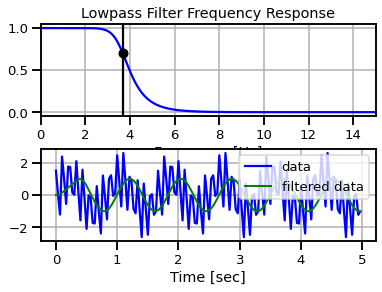

In [ ]:
# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

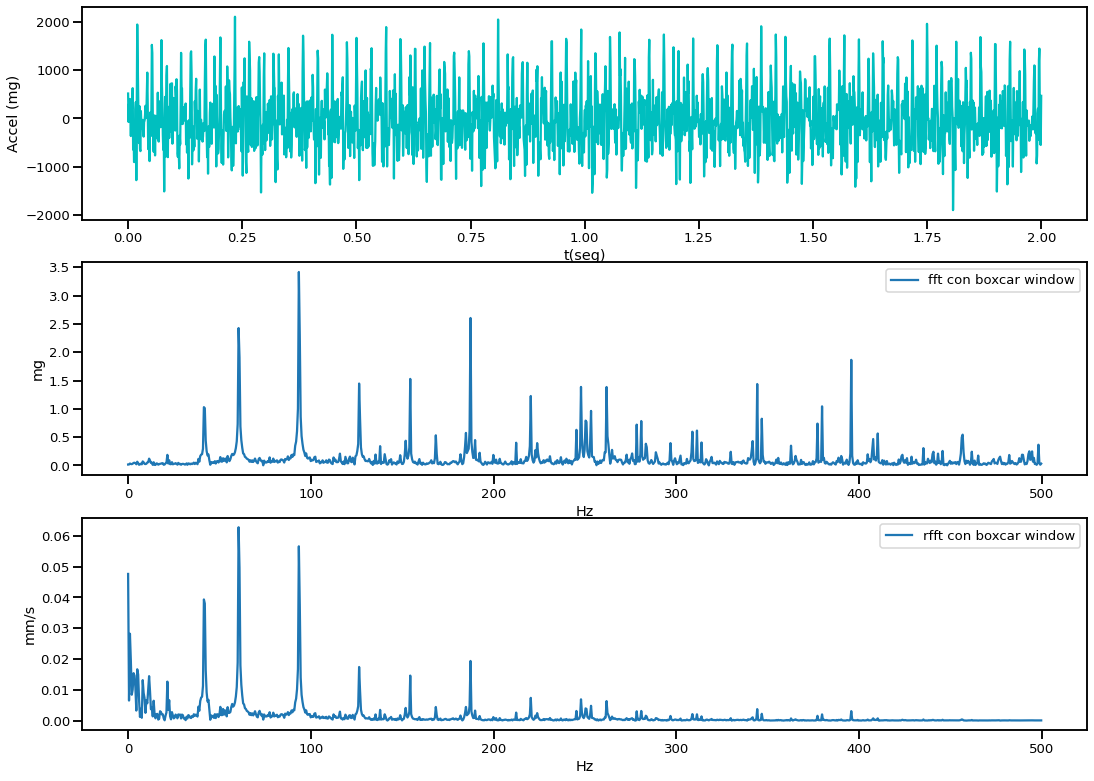

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)

window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
window ='boxcar'
n = len(a_int)
w = np.fft.rfft(a_int * get_window(window, m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])



plt.plot(freqs, (2.0/N * np.abs(w))/10, label='rfft con '+window+' window')
    #plt.plot(freqs, 0.707*(2.0/N * np.abs(w)), label='rfft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 1000)
#plt.xlim(0, 60)
#plt.xlim(-5, 1700)https://en.wikipedia.org/wiki/Aliasing
plt.ylabel('mm/s')
plt.xlabel('Hz')
plt.legend()
plt.savefig('raw_data2k_2603021.png')

In [ ]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y
    
def muestreo(tiempo, f):
  return (seg/f)
##https://stackoverflow.com/questions/12093594/how-to-implement-band-pass-butterworth-filter-with-scipy-signal-butter

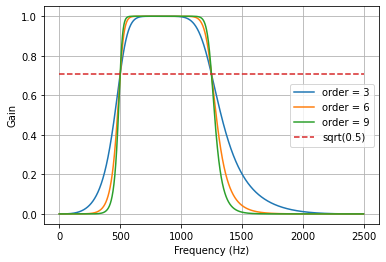

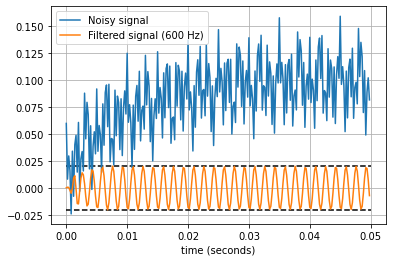

In [ ]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 5000
    lowcut = 500.0
    highcut = 1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = T * fs
    t = np.linspace(0, T, int(nsamples), endpoint=False)
    a = 0.02
    f0 = 600.0
    x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    x += a * np.cos(2 * np.pi * f0 * t + .11)
    x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    plt.figure(2)
    plt.clf()
    plt.plot(t, x, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [ ]:
from scipy.signal import butter, lfilter


def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
fs = 2.0
lowcut = 0.0
highcut = 500.0

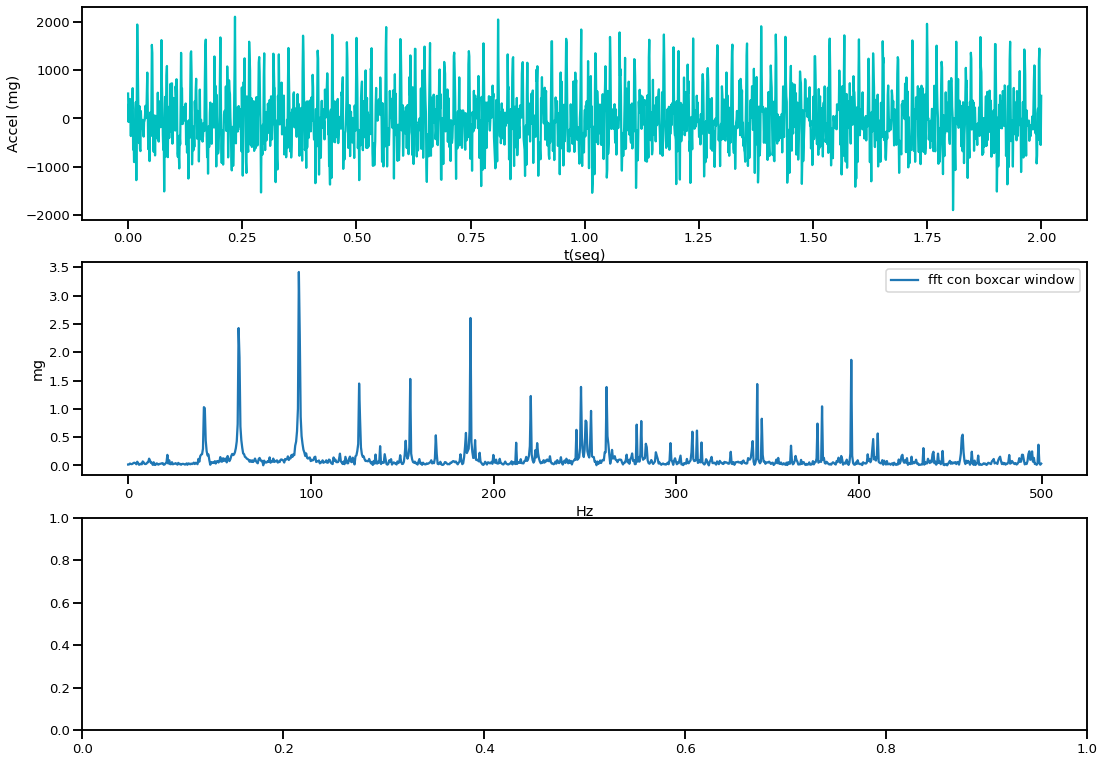

In [ ]:
plt.figure(figsize=(18,18))
plt.subplot(411)
plt.plot(t, s, 'c', label='signal')
plt.ylabel('Accel (mg)')
plt.xlabel('t(seg)')
plt.subplot(412)

window ='boxcar'
n = len(s)
w = np.fft.rfft(s * get_window(window, m), n=n) #Discrete Fourier transform of a real sequence. 
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])    
plt.plot(freqs, (2.0/N * np.abs(w))/100, label='fft con '+window+' window')
    #plt.plot(freqs, (0.707)*(2.0/N * np.abs(w)), label='fft con '+window+' window')
    #plt.plot(freqs, 20*np.log10(np.abs(w)), label=window)
#plt.xlim(-60, 500)
#plt.ylim(0, 6)
plt.ylabel('mg')
plt.xlabel('Hz')
plt.legend()
plt.subplot(413)
window ='boxcar'
n = len(a_int)
w = np.fft.rfft(a_int * get_window(window, m), n=n)
freqs = np.fft.rfftfreq(n, d=t[1] - t[0])

 # Filter a noisy signal.
    #T = 0.05
    #nsamples = T * fs
    #t = np.linspace(0, T, nsamples, endpoint=False)
    #a = 0.02
    #f0 = 600.0
    #x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    #x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    #x += a * np.cos(2 * np.pi * f0 * t + .11)
    #x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    #plt.figure(2)
    #plt.clf()
    #plt.plot(t, x, label='Noisy signal')


